In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby("area_type").count()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


### Check for full file duplicates

In [5]:
df.duplicated().sum()

529

### We will drop the duplicates

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# 13320 - 529 = 12791
df.shape

(12791, 9)

#### Drop features that are not required to build our model

In [8]:
#area_type, availability , society , balcony
df1 = df.drop(["area_type","availability","society","balcony"],axis = "columns")
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data Cleaning: Handle NA values

In [9]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

###### Since the count is less we can drop those values

In [10]:
df2 = df1.dropna()
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### dtypes of the columns we chose

In [11]:
df2.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

### Cleaning up the size column data

In [12]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2["bhk"] = df2["size"].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

C:\Users\sirisha\AppData\Local\Temp/ipykernel_15712/22795056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"] = df2["size"].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


### Cleaning up total_sqft column data

In [15]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
df2.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

### Since total_sqft is object we convert them into float

In [17]:
def float_value(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df2[~df2["total_sqft"].apply(float_value)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12955,Thanisandra,3 BHK,1437 - 1629,3.0,75.885,3
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [19]:
#since we have a string in the sqft column so we do a try exception handling
def avg_sqrt(x):
    sqrt = x.split("-")
    if len(sqrt) == 2:
        return (float(sqrt[0])+float(sqrt[1]))/2
    #avg = (float(sqrt[0])+float(sqrt[1]))/2
    try:
         return float(x)
    except:
        return None 

In [20]:
avg_sqrt("1437 - 1629")

1533.0

In [21]:
df2["total_sqft"][0]

'1056'

In [22]:
df2["total_sqft"] =  df2["total_sqft"].apply(avg_sqrt)
df2.head()

C:\Users\sirisha\AppData\Local\Temp/ipykernel_15712/288866428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["total_sqft"] =  df2["total_sqft"].apply(avg_sqrt)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

### Feature Engineering

#### Add new feature called price per square feet

In [24]:
#Adding a few called price_per_sqrt
#since the price is in lakhs we mutliple 1l to get correct price_per_sqrt
df3 = df2.copy()
df3["price_per_sqrt"] = df3["price"]*100000/df3["total_sqft"]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136


In [25]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
location_stats = df3["location"].value_counts(ascending=False)
location_stats

Whitefield           517
Sarjapur  Road       372
Electronic City      287
Kanakpura Road       242
Thanisandra          228
                    ... 
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [27]:
len(df3.location.unique())

1304

##### The above count will lead to dimensionality problem. Hence we need to reduce the same

#### There are location that are in single digit hence we keep them in other category

In [28]:
len(location_stats[location_stats>10])

233

In [29]:
#location_stats is a series hence we apply dataframe rules
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BEML Layout              10
Gunjur Palya             10
Dairy Circle             10
BTM 1st Stage            10
1st Block Koramangala    10
                         ..
Meenakshi Layout          1
Vidyapeeta                1
Maruthi Extension         1
Okalipura                 1
Abshot Layout             1
Name: location, Length: 1071, dtype: int64

### Dimensionality Reduction

### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [30]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [31]:
df3.groupby("location").count()

,size,total_sqft,bath,price,bhk,price_per_sqrt
location,,,,,,
Devarachikkanahalli,14,14,14,14,14,14
1st Block Jayanagar,14,14,14,14,14,14
1st Phase JP Nagar,25,24,25,25,25,24
2nd Stage Nagarbhavi,20,20,20,20,20,20
5th Block Hbr Layout,12,12,12,12,12,12
...,...,...,...,...,...,...
Yelahanka,207,207,207,207,207,207
Yelahanka New Town,41,40,41,41,41,40
Yelenahalli,13,13,13,13,13,13


#### Assuming the typical bedroom sq ft to 200. Using this we remove the outliers

In [32]:
#Pls display the rows that have bedroom with sqft less than 200

df3[df3.total_sqft/df3.bhk < 200]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...
13073,Nagarbhavi,4 Bedroom,600.0,3.0,100.0,4,16666.666667
13112,Nagavara,3 Bedroom,440.0,3.0,35.0,3,7954.545455
13198,other,8 Bedroom,1200.0,8.0,140.0,8,11666.666667
13221,other,9 Bedroom,1178.0,9.0,75.0,9,6366.723260


#### We are removing the above data points as the sqrft:bhk ratio is illlogical

In [33]:
df4 = df3[~(df3.total_sqft/df3.bhk < 200)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136


In [34]:
df4.price_per_sqrt.describe()

count     12332.000000
mean       6555.812967
std        4400.019232
min         267.829813
25%        4272.727273
50%        5414.042721
75%        7162.183731
max      176470.588235
Name: price_per_sqrt, dtype: float64

In [35]:
min_thresh , max_thresh = df4.price_per_sqrt.quantile([0.0001, 0.9999])
min_thresh , max_thresh

(381.97357142857146, 76831.5934065929)

In [36]:
df4[df4.price_per_sqrt > (df4.price_per_sqrt.mean() +3*df4.price_per_sqrt.std())]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
159,Mahalakshmi Layout,4 Bedroom,3750.0,4.0,760.0,4,20266.666667
192,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083.333333
413,Mahalakshmi Layout,6 Bedroom,1200.0,7.0,250.0,6,20833.333333
480,other,4 BHK,1150.0,4.0,260.0,4,22608.695652
743,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719.165085
...,...,...,...,...,...,...,...
13200,other,6 Bedroom,8000.0,6.0,2800.0,6,35000.000000
13213,other,4 Bedroom,1200.0,5.0,325.0,4,27083.333333
13247,other,4 Bedroom,1200.0,5.0,325.0,4,27083.333333
13305,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000.000000


In [37]:
#group_location  = df4.groupby("location")
#for key , name in group_location:
#      print(name.size)

In [38]:
#groupby function returns a dataframe for given key
#we use dataframe concat as each location requires to appended
def rem_out_price_per_sqrt(df):
    df_new = pd.DataFrame()
    group_location  = df4.groupby("location")
    for name , df_grp in group_location:
        mn = np.mean(df_grp.price_per_sqrt)
        sd = np.std(df_grp.price_per_sqrt)
        after_outlier = df_grp[(df_grp.price_per_sqrt > (mn-sd)) & (df_grp.price_per_sqrt <= (mn+sd))]
        df_new = pd.concat([df_new, after_outlier],ignore_index=True)
    return df_new

In [39]:
df5 = rem_out_price_per_sqrt(df4)

In [40]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...
10219,other,6 Bedroom,1200.0,5.0,130.00,6,10833.333333
10220,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10221,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10222,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [41]:
df6 = df5.copy()
df6.location = df6.location.apply(lambda x: x.strip())
df6.location

0        Devarachikkanahalli
1        Devarachikkanahalli
2        Devarachikkanahalli
3        Devarachikkanahalli
4        Devarachikkanahalli
                ...         
10219                  other
10220                  other
10221                  other
10222                  other
10223                  other
Name: location, Length: 10224, dtype: object

In [42]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...
10219,other,6 Bedroom,1200.0,5.0,130.00,6,10833.333333
10220,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10221,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10222,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [43]:
df6[(df6.location == "Devarachikkanahalli") & (df6.bhk == 2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
6,Devarachikkanahalli,2 BHK,1130.0,2.0,36.0,2,3185.840708
8,Devarachikkanahalli,2 BHK,1230.0,2.0,58.0,2,4715.447154
10,Devarachikkanahalli,2 BHK,1116.0,2.0,47.0,2,4211.469534
11,Devarachikkanahalli,2 BHK,991.0,2.0,40.0,2,4036.326942


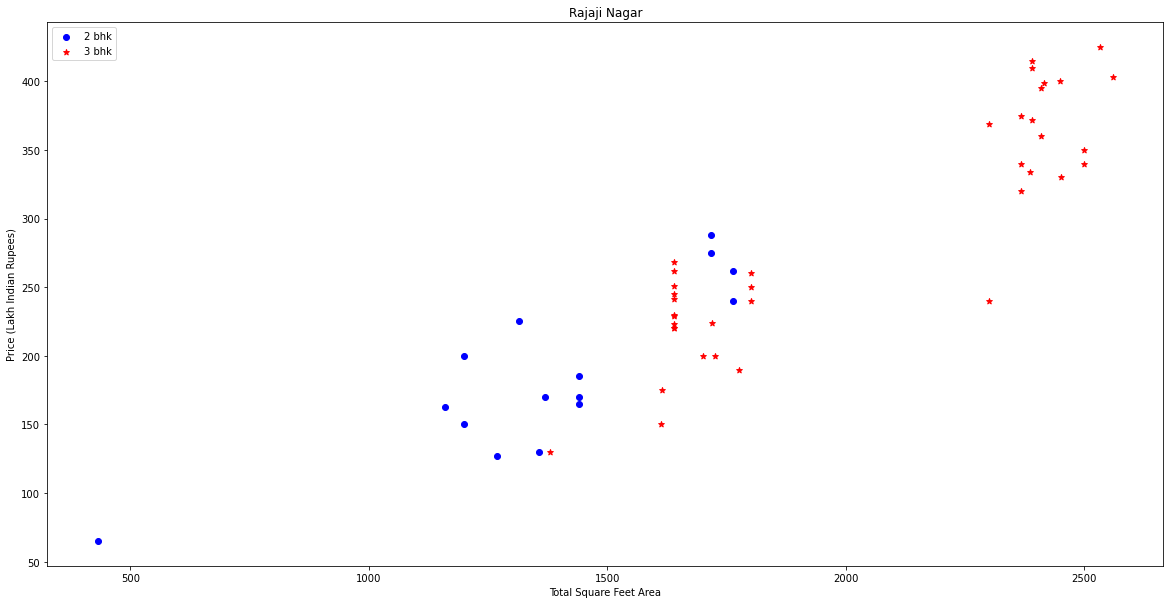

In [44]:
def plot_scatter_location(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 bhk")
    plt.scatter(bhk3.total_sqft,bhk3.price,color="red",marker="*", label="3 bhk")
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_location(df6,"Rajaji Nagar")

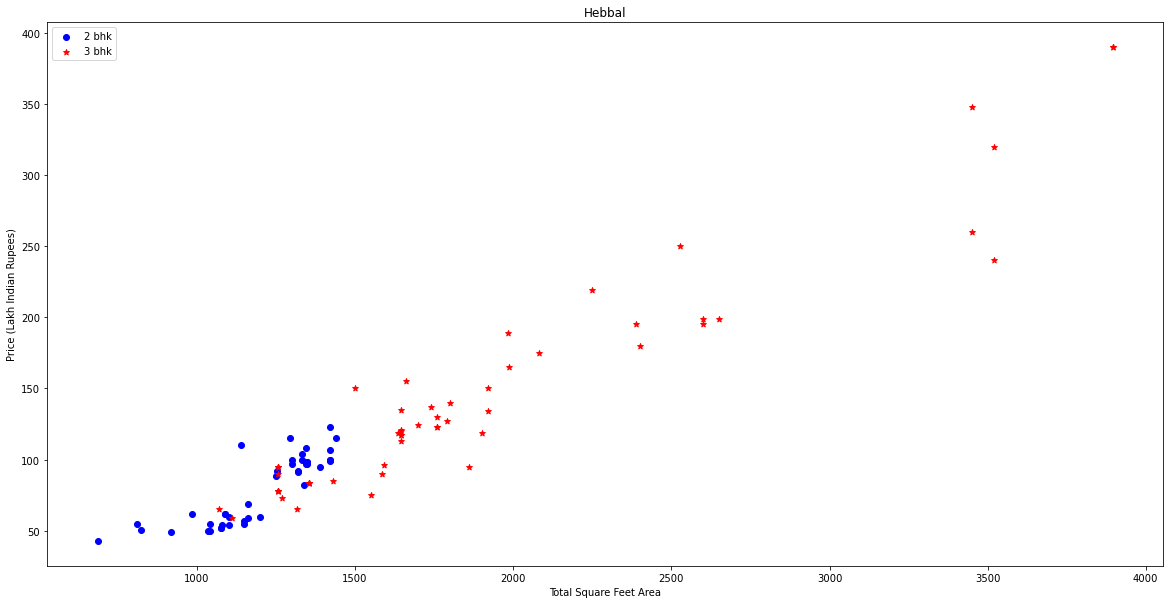

In [45]:
plot_scatter_location(df6,"Hebbal")

In [46]:
def outlier_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stat = {}
        for bhk , df1_bhk in location_df.groupby("bhk"):
            bhk_stat[bhk] = {
            "mean" : np.mean(df1_bhk.price_per_sqrt),
            "std"  : np.std(df1_bhk.price_per_sqrt),
            "count" : df1_bhk.shape[0]
         }
        for bhk , df1_bhk in location_df.groupby("bhk"):
            compare_prev_bhk = bhk_stat.get(bhk-1)
            if compare_prev_bhk and compare_prev_bhk['count']>5:
                exclude_indices = np.append(exclude_indices, df1_bhk[df1_bhk.price_per_sqrt<(compare_prev_bhk['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

In [47]:
df7 = outlier_bhk(df6)

In [48]:
df7.shape

(7288, 7)

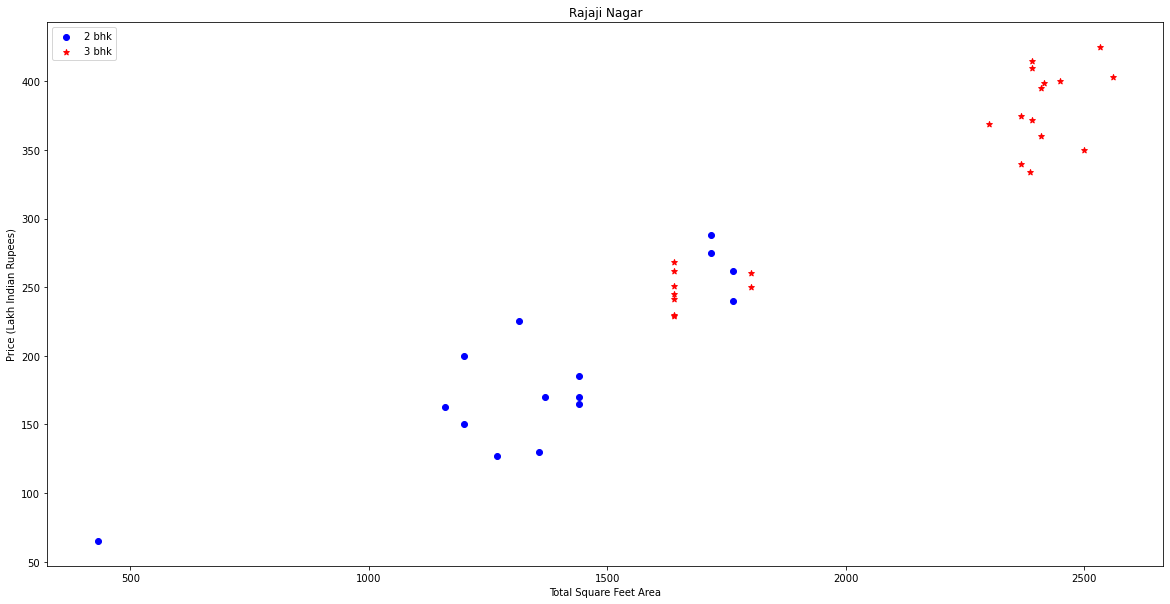

In [49]:
plot_scatter_location(df7,"Rajaji Nagar")

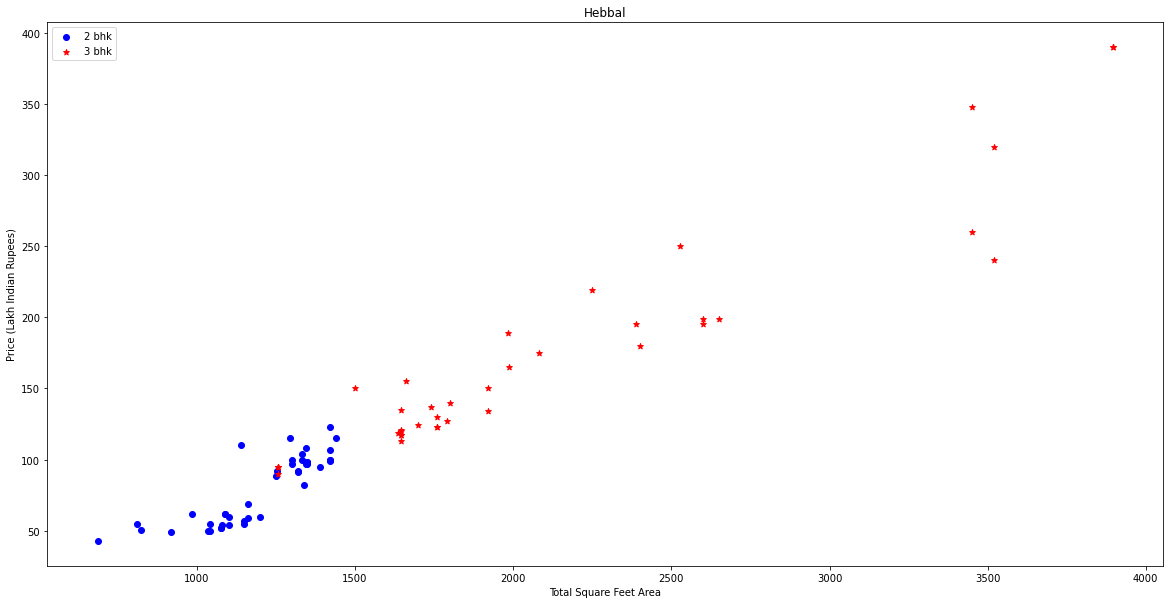

In [50]:
plot_scatter_location(df7,"Hebbal")

Text(0, 0.5, 'Count')

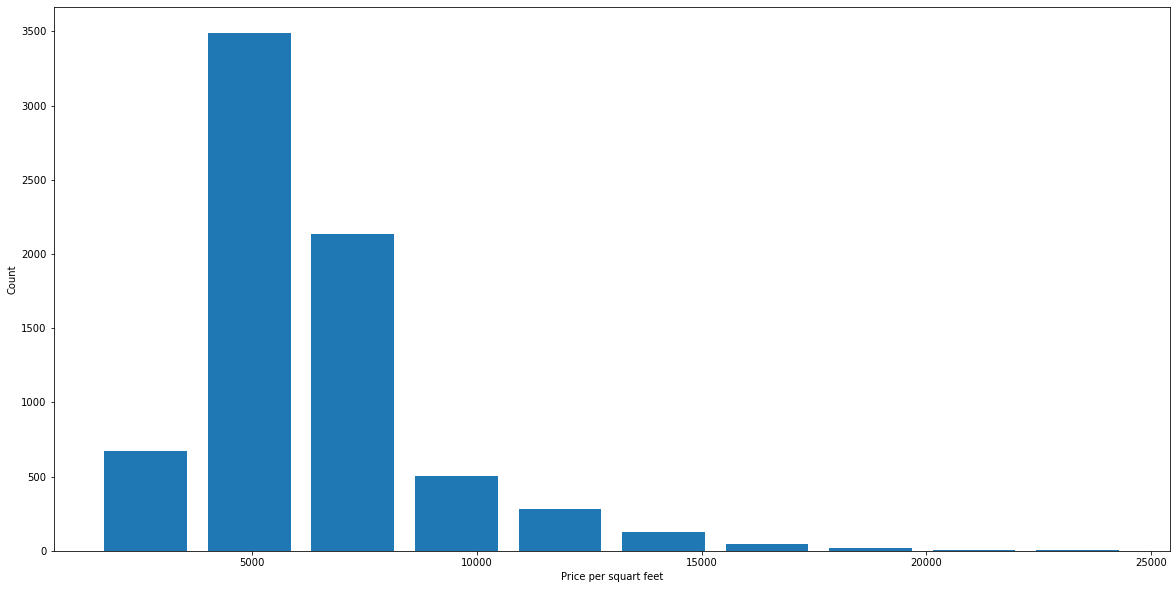

In [51]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqrt,rwidth=0.8)
plt.xlabel("Price per squart feet")
plt.ylabel("Count")

### Check the outlier of Bathrooms

In [52]:
df7.bath.unique()

array([ 2.,  3.,  4.,  6.,  5.,  8.,  1.,  7.,  9., 12., 10., 27., 16.,
       13.])

Text(0, 0.5, 'Count')

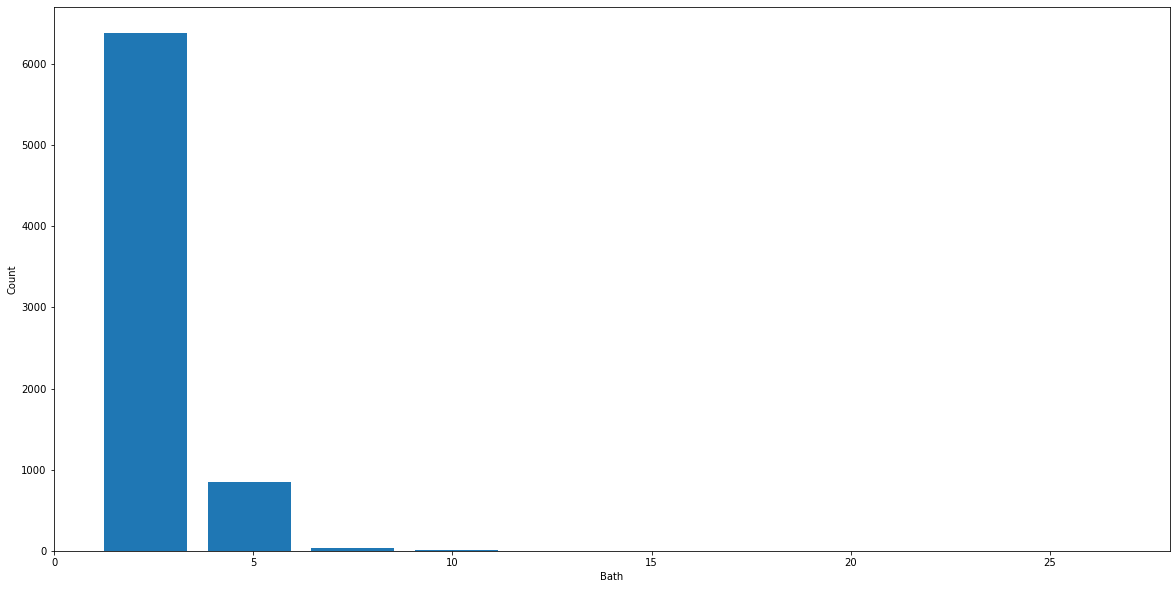

In [53]:
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel("Bath")
plt.ylabel("Count")

In [54]:
df8 = df7[~((df7.bath == df7.bhk) & (df7.bath >= 10) & (df7.total_sqft < 10000))]

#### It is unusual to have 2 more bathrooms than number of bedrooms in a home also the above data looks illogical. Hence removing the same.

In [55]:
df9 = df8[(df8.bath) <= (df8.bhk+2)]
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...,...
10215,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10216,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10219,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
10220,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


#### If you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [56]:
df10 = df9.drop(["size" , "price_per_sqrt"],axis = "columns")
df10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


### One hot encoding for location field

In [57]:
dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df11 = pd.concat([df10,dummies],axis="columns")

In [59]:
df12 = df11.drop("location", axis="columns")
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10216,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10219,1200.0,5.0,130.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10220,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Let us now creat tain and test data

In [60]:
X = df12.drop("price",axis="columns")
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10216,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10219,1200.0,5.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10220,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
y = df12.price
y

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10215     70.0
10216    200.0
10219    130.0
10220     26.0
10223    400.0
Name: price, Length: 7280, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [63]:
X_train

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
5437,1610.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
655,1205.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8992,550.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6490,1595.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7440,613.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1560.0,3.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4230,1185.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1592,1010.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5656,1235.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.linear_model import LinearRegression
Linreg = LinearRegression()
Linreg.fit(X_train, y_train)
Linreg.score(X_test, y_test)

0.8449834222505241

### Use K Fold cross validation to measure accuracy of our LinearRegression model


In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5 , test_size=0.2, random_state=10)
cross_val_score(Linreg, X, y , cv=cv)

array([0.84498342, 0.86711121, 0.82598883, 0.78521422, 0.81939464])

### Find best model using GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def model_sel(X, y):
    algos = {
        'LinearRegression' : {"model": LinearRegression() , 'params' : {'normalize':[True, False]}},
      'decsion_tree' : {'model':DecisionTreeRegressor(), 'params': {'criterion' : ['mse','friedman_mse'], 'splitter': ['best','random']}},
        'lasso' : {'model':Lasso(), 'params':{'alpha': [1,2],'selection': ['random', 'cyclic']}}
        
    }
    
    scores = []

    cv = ShuffleSplit(n_splits=5 , test_size=0.2, random_state=10)

    for model_name, mp in algos.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
        clf.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
    })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
model_sel(X,y)

,model,best_score,best_params
0,LinearRegression,0.831129,{'normalize': True}
1,decsion_tree,0.762075,"{'criterion': 'mse', 'splitter': 'random'}"
2,lasso,0.698949,"{'alpha': 1, 'selection': 'random'}"


In [107]:
X.columns
location_index = np.where(X.columns=='1st Phase JP Nagar')[0][0]
location_index

4

In [99]:
def predict_price(location,sqft,bath,bhk):
    location_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if location_index >= 1:
        x[location_index] = 1
    return Linreg.predict([x])

In [100]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

(array([4], dtype=int64),)
Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=237)


TypeError: '>=' not supported between instances of 'tuple' and 'int'

In [69]:
predict_price('Electronic city phase ii',1000, 3, 3)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
predict_price('Kalyan nagar', 1000, 2, 2)

In [ ]:
predict_price('Indira Nagar',1000, 2, 2)

In [ ]:
predict_price('Indira Nagar',1000, 2, 3)

### Export the tested model to a pickle file

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(Linreg,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
           f.write(json.dumps(columns))